In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
loan_df = pd.read_csv("loan.csv",header =0,low_memory=False)
loan_df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [31]:
loan_df.shape

(39717, 111)

In [32]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [33]:
loan_df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

## we found more Null values, we are removing columns which have Null values,
## After Removing we found 43 Columns

In [34]:
loan_df.dropna(axis=1,inplace =True)
loan_df.shape[1]

43

## List of Columns Found in dataframe

In [35]:
loan_df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'pymnt_plan', 'url', 'purpose', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

### Some of the Columns are not required for defaulting analysis, so we are going to remove below List of Columns
### ["id", "member_id", "url",  "zip_code",  "addr_state","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee",  "last_pymnt_amnt"]



In [36]:
loan_df.drop(["id", "member_id", "url",  "zip_code",  "addr_state","out_prncp_inv","total_pymnt_inv","funded_amnt", "delinq_2yrs", "revol_bal", "out_prncp", "total_pymnt", "total_rec_prncp", "total_rec_int", "total_rec_late_fee", "recoveries", "collection_recovery_fee",  "last_pymnt_amnt"]
, axis = 1, inplace = True)
loan_df.shape[1]

25

In [38]:
loan_df.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'purpose', 'dti', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'total_acc', 'initial_list_status', 'policy_code',
       'application_type', 'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

In [41]:
loan_df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

### we are going to Exclude LoanStatus = Current, we are going to analyse loan staus which has Fully Paid  and Charged off, we are not doing any thing with current loans


In [52]:
loan_df = loan_df[loan_df['loan_status'] != 'Current']
loan_df['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

### Checking For Missing Values

In [61]:
loan_df.isna().sum()

loan_amnt              0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
sub_grade              0
home_ownership         0
annual_inc             0
verification_status    0
issue_d                0
loan_status            0
pymnt_plan             0
purpose                0
dti                    0
earliest_cr_line       0
inq_last_6mths         0
open_acc               0
pub_rec                0
total_acc              0
initial_list_status    0
policy_code            0
application_type       0
acc_now_delinq         0
delinq_amnt            0
dtype: int64

In [65]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   home_ownership       38577 non-null  object 
 8   annual_inc           38577 non-null  float64
 9   verification_status  38577 non-null  object 
 10  issue_d              38577 non-null  object 
 11  loan_status          38577 non-null  object 
 12  pymnt_plan           38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

### Above dataframe information int_rate was an object we are removing % and changing to numeric datatype

In [75]:
loan_df['int_rate'] = pd.to_numeric(loan_df['int_rate'].str.replace('%',''))

In [76]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,policy_code,application_type,acc_now_delinq,delinq_amnt
0,5000,4975.0,36 months,10.65,162.87,B,B2,RENT,24000.0,Verified,...,Jan-85,1,3,0,9,f,1,INDIVIDUAL,0,0
1,2500,2500.0,60 months,15.27,59.83,C,C4,RENT,30000.0,Source Verified,...,Apr-99,5,3,0,4,f,1,INDIVIDUAL,0,0
2,2400,2400.0,36 months,15.96,84.33,C,C5,RENT,12252.0,Not Verified,...,Nov-01,2,2,0,10,f,1,INDIVIDUAL,0,0
3,10000,10000.0,36 months,13.49,339.31,C,C1,RENT,49200.0,Source Verified,...,Feb-96,1,10,0,37,f,1,INDIVIDUAL,0,0
5,5000,5000.0,36 months,7.90,156.46,A,A4,RENT,36000.0,Source Verified,...,Nov-04,3,9,0,12,f,1,INDIVIDUAL,0,0


### Outlier Treatment 

###  Column :  annual_inc  [The self-reported annual income provided by the borrower during registration.] 


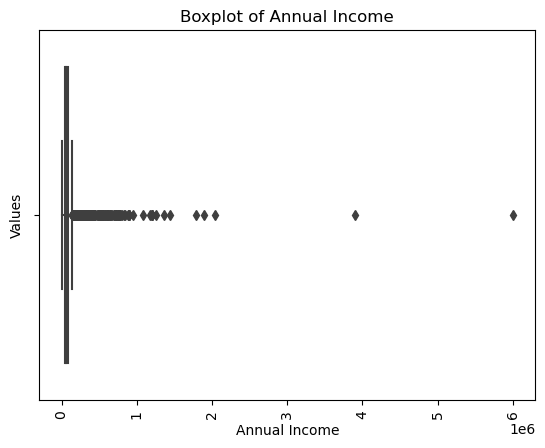

In [88]:
sns.boxplot(data = loan_df, x='annual_inc')
plt.xticks(rotation=90)  
plt.xlabel('Annual Income') 
plt.ylabel('Values')  
plt.title('Boxplot of Annual Income') 
plt.show()


In [89]:
loan_df['annual_inc'].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])

0.50     58868.0
0.75     82000.0
0.90    115000.0
0.95    140004.0
0.97    165000.0
0.98    187000.0
0.99    234144.0
Name: annual_inc, dtype: float64

### Remove Quantile <=  95 for annual_inc

In [98]:
per_95_annual_inc = loan_df['annual_inc'].quantile(0.95)
# per_95_annual_inc
loan_df = loan_df[loan_df.annual_inc <= per_95_annual_inc]
loan_df.shape

(33096, 25)

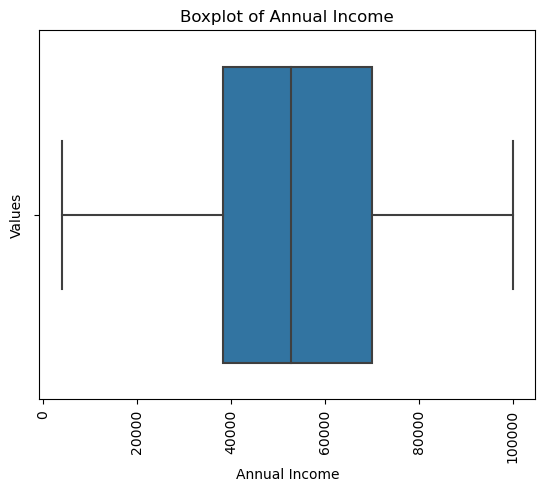

In [99]:
sns.boxplot(data = loan_df, x='annual_inc')
plt.xticks(rotation=90)  
plt.xlabel('Annual Income') 
plt.ylabel('Values')  
plt.title('Boxplot of Annual Income') 
plt.show()


### Now to annual_inc data looks good.
### Let's validate other numerical variables which could possibly have outliers.

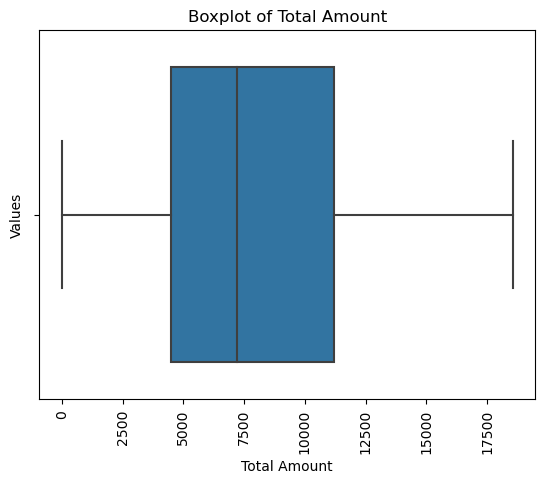

In [109]:
# funded_amnt_inv : The total amount committed by investors for that loan at that point in time.C

per_95_funded_amnt_inv = loan_df['funded_amnt_inv'].quantile(0.95)
# per_95_funded_amnt_inv
loan_df = loan_df[loan_df.funded_amnt_inv <= per_95_funded_amnt_inv]
loan_df.shape
sns.boxplot(data = loan_df, x='funded_amnt_inv')
plt.xticks(rotation=90)  
plt.xlabel('Total Amount') 
plt.ylabel('Values')  
plt.title('Boxplot of Total Amount') 
plt.show()


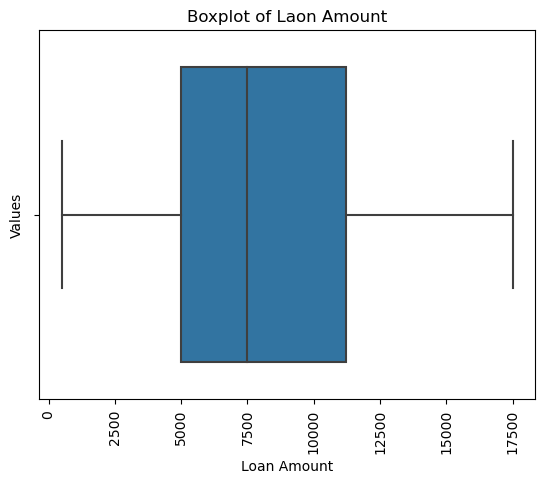

In [110]:
# loan_amnt: The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

per_95_loan_amnt = loan_df['loan_amnt'].quantile(0.95)
# per_95_funded_amnt_inv
loan_df = loan_df[loan_df.loan_amnt <= per_95_loan_amnt]
loan_df.shape
sns.boxplot(data = loan_df, x='loan_amnt')
plt.xticks(rotation=90)  
plt.xlabel('Loan Amount') 
plt.ylabel('Values')  
plt.title('Boxplot of Laon Amount') 
plt.show()

## Visualizing Data

In [112]:
loan_df.shape


(28445, 25)

In [113]:
loan_df.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,...,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,policy_code,application_type,acc_now_delinq,delinq_amnt
0,5000,4975.0,36 months,10.65,162.87,B,B2,RENT,24000.0,Verified,...,Jan-85,1,3,0,9,f,1,INDIVIDUAL,0,0
1,2500,2500.0,60 months,15.27,59.83,C,C4,RENT,30000.0,Source Verified,...,Apr-99,5,3,0,4,f,1,INDIVIDUAL,0,0
2,2400,2400.0,36 months,15.96,84.33,C,C5,RENT,12252.0,Not Verified,...,Nov-01,2,2,0,10,f,1,INDIVIDUAL,0,0
3,10000,10000.0,36 months,13.49,339.31,C,C1,RENT,49200.0,Source Verified,...,Feb-96,1,10,0,37,f,1,INDIVIDUAL,0,0
5,5000,5000.0,36 months,7.90,156.46,A,A4,RENT,36000.0,Source Verified,...,Nov-04,3,9,0,12,f,1,INDIVIDUAL,0,0


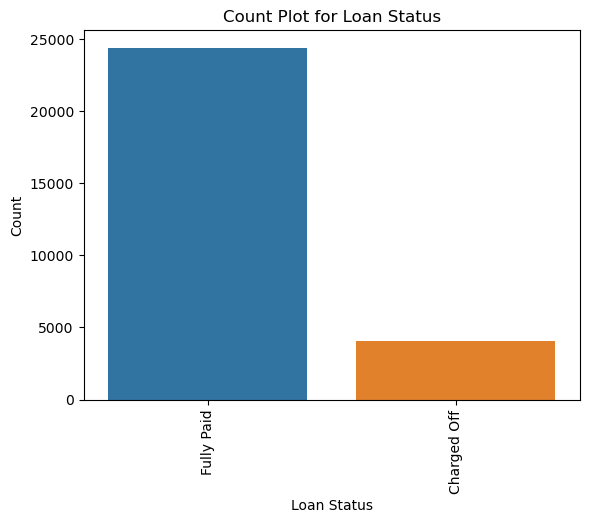

In [115]:
sns.countplot(x = 'loan_status', data = loan_df)
plt.xticks(rotation=90)  
plt.xlabel('Loan Status') 
plt.ylabel('Count')  
plt.title('Count Plot for Loan Status') 
plt.show()

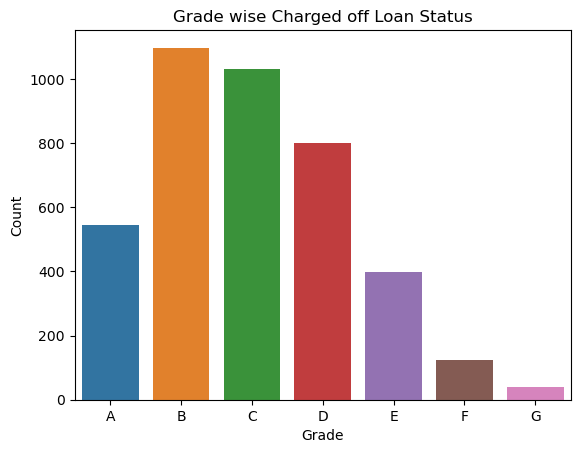

In [122]:
# Grade wise loan data for charge off Loan status
sns.countplot(x = 'grade', data = loan_df[loan_df.loan_status == 'Charged Off'],order = ['A','B','C','D','E','F','G'])
plt.xlabel('Grade') 
plt.ylabel('Count')  
plt.title('Grade wise Charged off Loan Status') 
plt.show()

In [125]:
# Analysing Purpose of loans
loan_df.purpose.value_counts()

debt_consolidation    12875
credit_card            3652
other                  3196
home_improvement       1862
major_purchase         1755
car                    1306
small_business         1112
wedding                 721
medical                 547
moving                  482
vacation                332
educational             277
house                   250
renewable_energy         78
Name: purpose, dtype: int64

### Charged off For Purpose of loan

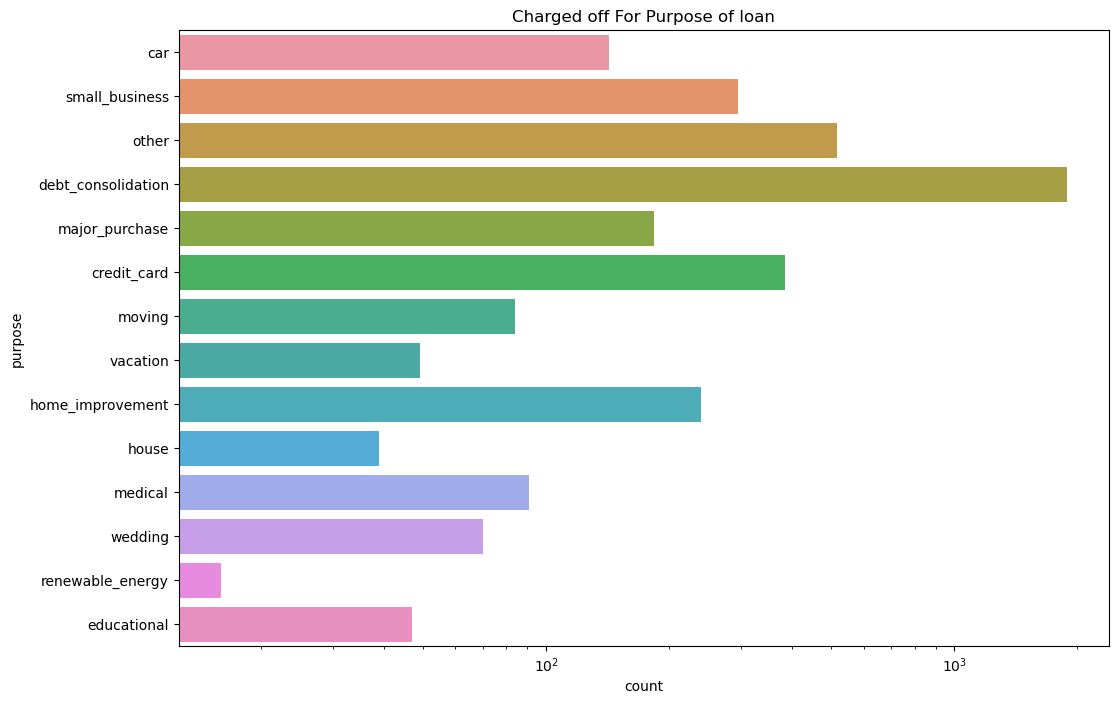

In [132]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(data=loan_df[loan_df.loan_status == 'Charged Off'] ,y ='purpose')
plt.title('Charged off For Purpose of loan') 
plt.show()


In [148]:
#creating bins for int_rate
loan_df['int_rate_groups'] = pd.cut(loan_df['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])


In [ ]:
loan_df[['int_rate','int_rate_groups']].head()

,int_rate,int_rate_groups
0,10.65,9%-13%
1,15.27,13%-17%
2,15.96,13%-17%
3,13.49,13%-17%
5,7.90,5%-9%


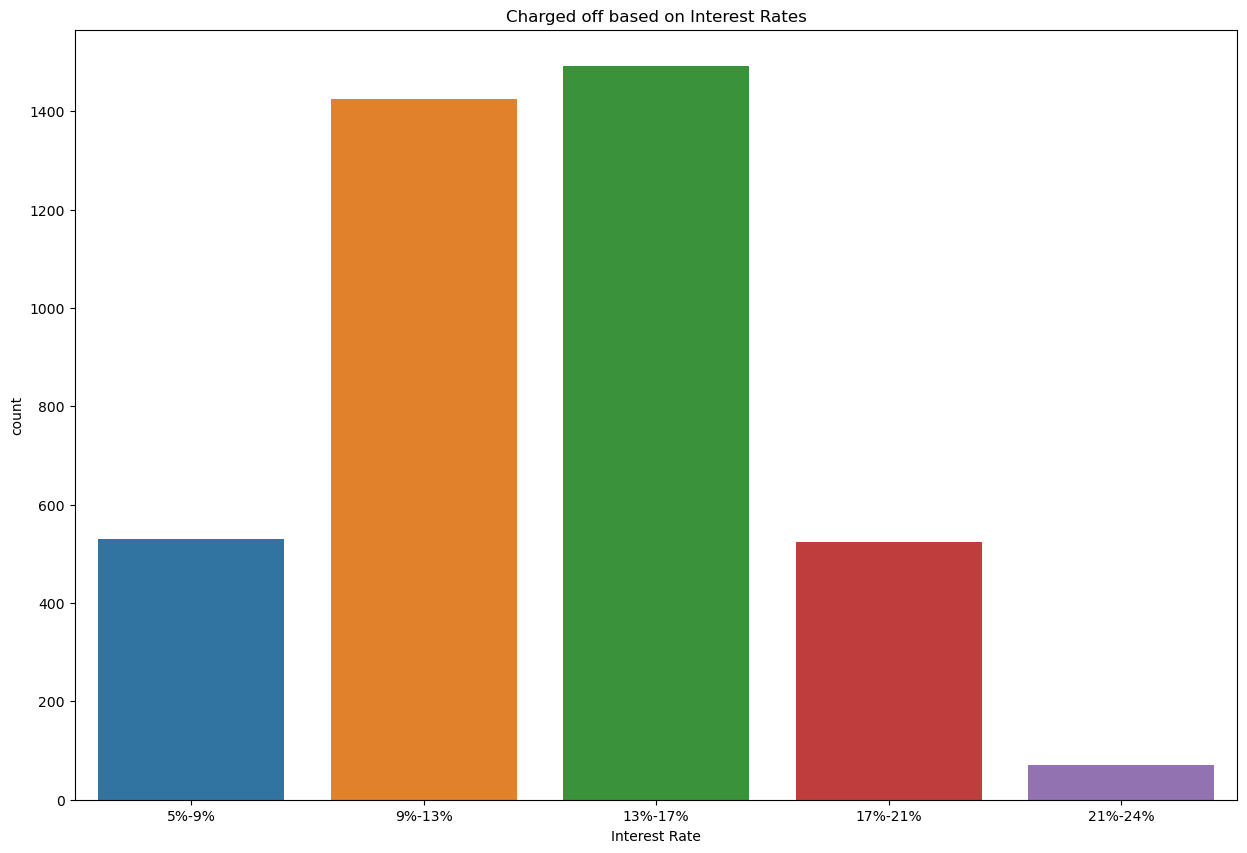

In [162]:
# Charged off based on Interest Rates
fig, ax = plt.subplots(figsize = (15,10))
sns.countplot(x='int_rate_groups', data=loan_df[loan_df.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.title('Charged off based on Interest Rates') 

plt.show()

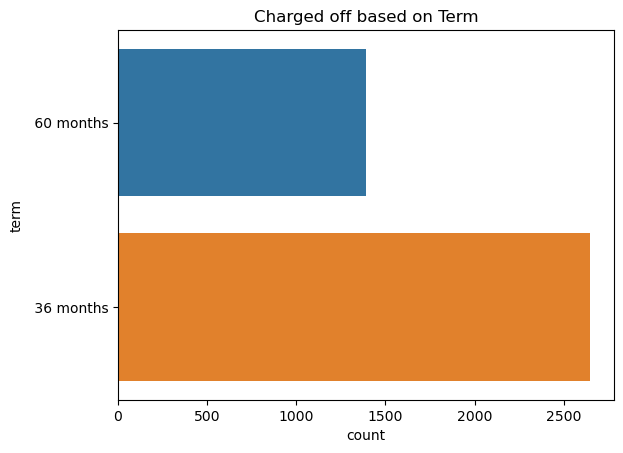

In [163]:
# Charged off based on Term
sns.countplot(y='term', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.title('Charged off based on Term') 

plt.show()

### Analying By Loan Funded Month and Year

In [168]:
## Extracting month and year based on loan funded

df_month_year = loan_df['issue_d'].str.partition("-", True)     
loan_df['issue_month']=df_month_year[0]                       
loan_df['issue_year']='20' + df_month_year[2]

In [169]:
loan_df[['issue_d','issue_month','issue_year']].head()

,issue_d,issue_month,issue_year
0,Dec-11,Dec,2011
1,Dec-11,Dec,2011
2,Dec-11,Dec,2011
3,Dec-11,Dec,2011
5,Dec-11,Dec,2011


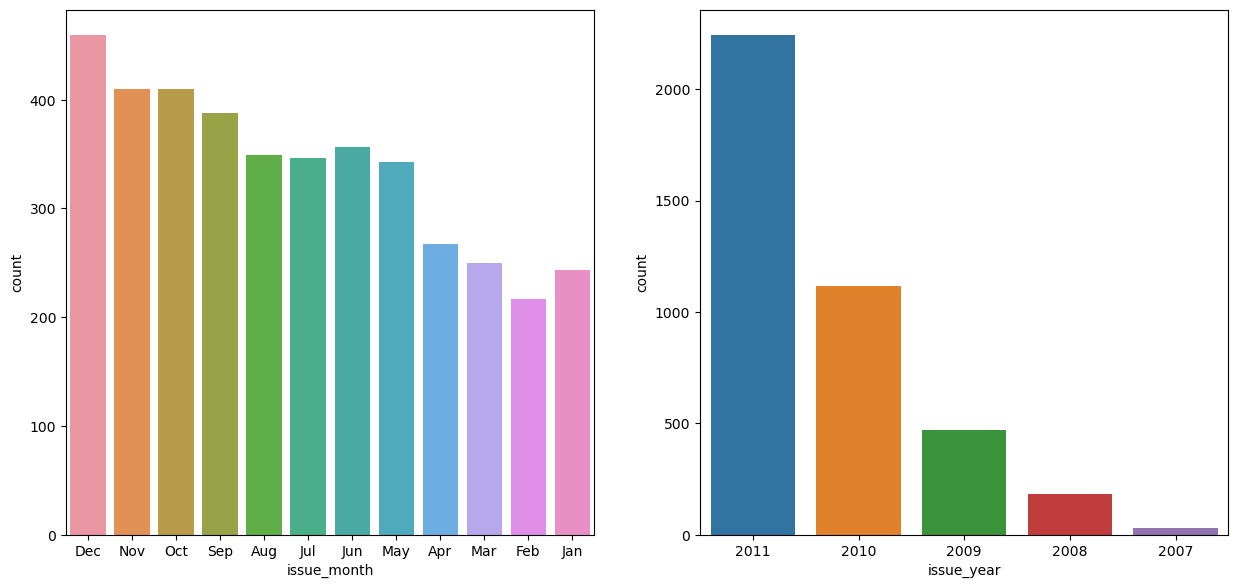

In [172]:
plt.figure(figsize=(15,15))
plt.subplot(221)
sns.countplot(x='issue_month', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.subplot(222)
sns.countplot(x='issue_year', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.show()

  # Findings For Loan Default
  ## 1. Maximum Nuber of  defaults occur in Loan Funded Year 2011 & Month Dec

In [173]:
loan_df.installment.value_counts()

311.11    59
180.96    50
311.02    49
150.80    42
368.45    40
          ..
317.86     1
274.49     1
185.52     1
67.41      1
255.43     1
Name: installment, Length: 11070, dtype: int64

In [175]:
loan_df.loan_amnt.value_counts()

10000    2452
12000    1921
5000     1852
6000     1708
15000    1481
         ... 
16550       1
9075        1
9825        1
9725        1
8275        1
Name: loan_amnt, Length: 598, dtype: int64

In [177]:
# Creating Group for Innstallments & Loan Amount
loan_df['installment_groups'] = pd.cut(loan_df['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_df['loan_amnt_groups'] = pd.cut(loan_df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])


In [179]:
loan_df[['installment','installment_groups','loan_amnt','loan_amnt_groups']].head()

,installment,installment_groups,loan_amnt,loan_amnt_groups
0,162.87,274-403,5000,5k-10k
1,59.83,14-145,2500,0-5k
2,84.33,145-274,2400,0-5k
3,339.31,660-789,10000,15k-20k
5,156.46,274-403,5000,5k-10k


<Axes: xlabel='loan_amnt_groups', ylabel='count'>

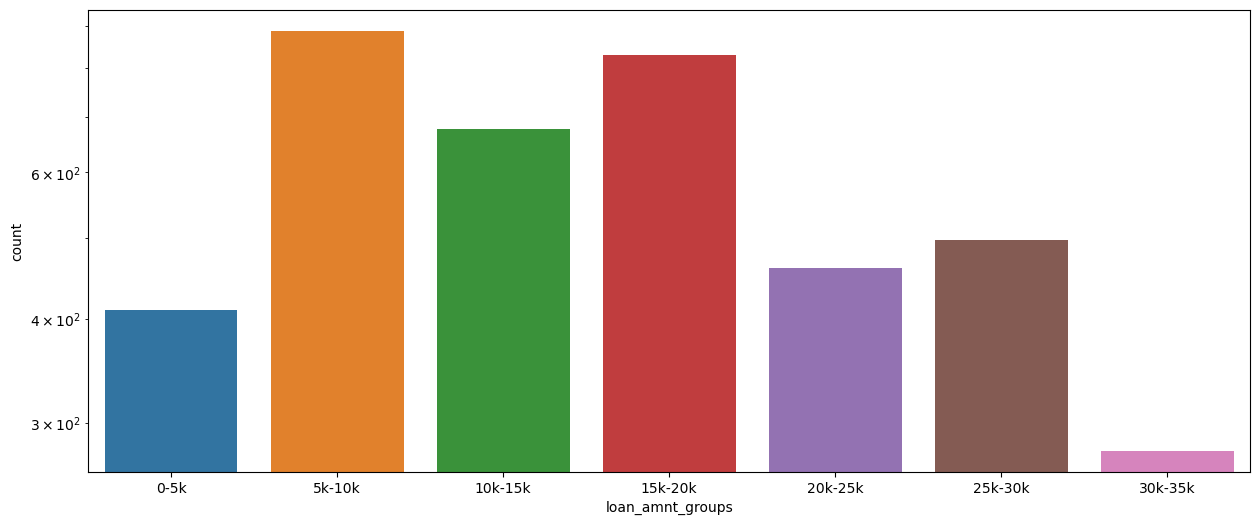

In [181]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])

<function matplotlib.pyplot.show(close=None, block=None)>

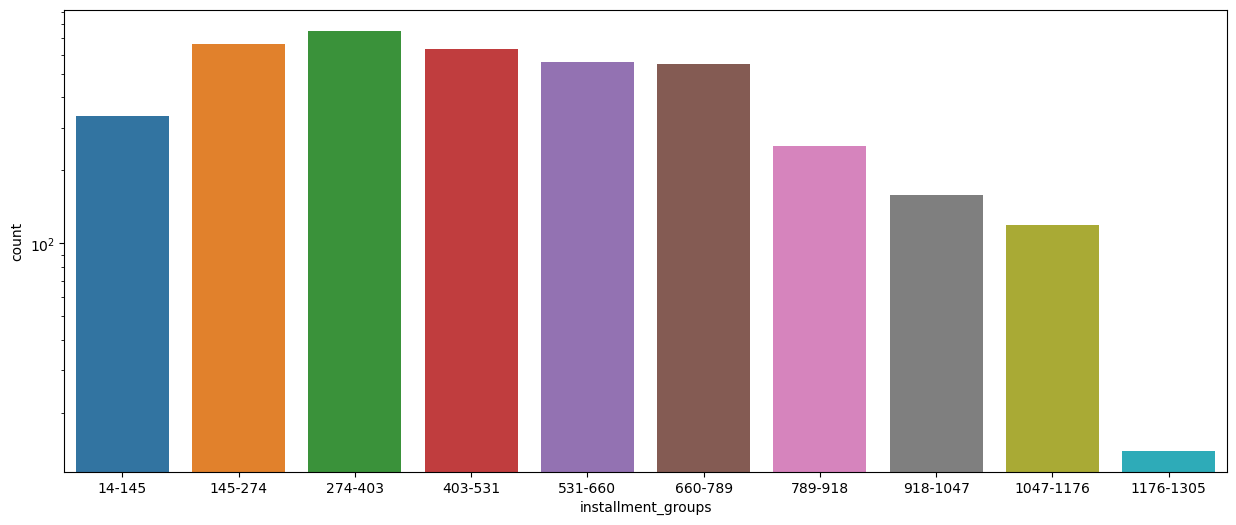

In [183]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan_df[loan_df['loan_status']=='Charged Off'])
plt.show

# Findings for Loan Default

## Loan funded amount by investor is between 5000-10000
## Monthly installments are between 274 - 403

## Analysing Loan Amount With Interest rates

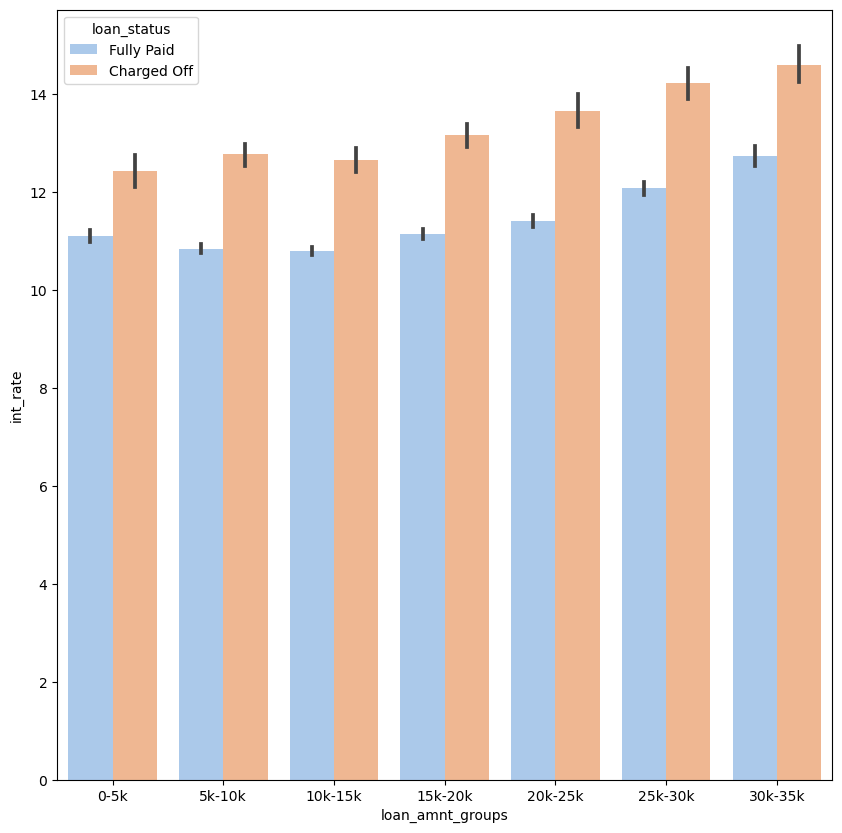

In [188]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_df,x='loan_amnt_groups', y='int_rate', hue ='loan_status',palette="pastel")
plt.show()

## Findings
Interest Rate More than 14% has more Defaulters
Loan Amount Group with More than 30K to 35k has more defaulters